# Climate dynamics
## Predicting the weather: timeseries approach
In this part of the climate dynamics tutorial, we will try to predict the temperature in Oxford on 19th November 2025. Here we will use timeseries data from a historical simulation of a climate model. 

Import all the requirements we need. We will be using `xarray` to open datasets again.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import nc_time_axis
from IPython.display import display, Latex
from scipy.constants import convert_temperature

As we are using timeseries data, we will select daily time resolution. Since the task requires us to use CMIP6 data, we will use the historical experiment - this means it is the CMIP6 historical simulation, so it is may not be exactly in line with observations. 

In [2]:
data_path = "./data/"
filename = f"{data_path}t_CMIP6_historical_HadGEM3-GC31-LL_mon_195001-201412_UK.nc"

In [3]:
ds = xr.open_dataset(filename)
ds

<xarray.Dataset> Size: 22kB
Dimensions:          (bnds: 2, time: 780)
Coordinates:
    lat              float64 8B ...
    lon              float64 8B ...
  * time             (time) datetime64[ns] 6kB 1950-01-01 ... 2014-12-01
    member_id        <U29 116B ...
    gcm_institution  <U4 16B ...
    gcm_model        <U15 60B ...
    gcm_variant      <U8 32B ...
    height2m         float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    lat_bnds         (bnds) float64 16B ...
    lon_bnds         (bnds) float64 16B ...
    time_bnds        (time, bnds) datetime64[ns] 12kB ...
    t                (time) float32 3kB ...
    crs              int32 4B ...
Attributes: (12/28)
    Conventions:                CF-1.9 ACDD-1.3
    title:                      IPCC-WGI AR6 Interactive Atlas Dataset
    summary:                    IPCC-WGI AR6 Interactive Atlas dataset: Month...
    keywords:                   CMIP5, CMIP6, CORDEX, IPCC, Interactive Atlas
    institution:                Instituto de Fisica de Cantabria (IFCA, CSIC-...
    contact:                    ipcc-ddc@ifca.unican.es
    ...                         ...
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0
    geospatial_lon_resolution:  1.0
    geospatial_lon_units:       degrees_east
    date_created:               2022-10-26T00:00:00+00:00
    tracking_id:                4a14519f-05eb-4a2b-8e69-d5f1f8e500de

Select the variables and timeseries that is of interest for us. We want to get the air temperature variable `t`.

In [4]:
surface_temp = ds["t"] 
time = ds["time"] 
surface_temp

<xarray.DataArray 't' (time: 780)> Size: 3kB
[780 values with dtype=float32]
Coordinates:
    lat              float64 8B ...
    lon              float64 8B ...
  * time             (time) datetime64[ns] 6kB 1950-01-01 ... 2014-12-01
    member_id        <U29 116B ...
    gcm_institution  <U4 16B ...
    gcm_model        <U15 60B ...
    gcm_variant      <U8 32B ...
    height2m         float64 8B ...
Attributes:
    standard_name:  air_temperature
    units:          degC
    cell_methods:   time: mean within days time: mean over days area: mean
    long_name:      Monthly mean of daily mean temperature
    comment:        Monthly mean of daily mean near-surface (usually, 2 meter...
    grid_mapping:   crs

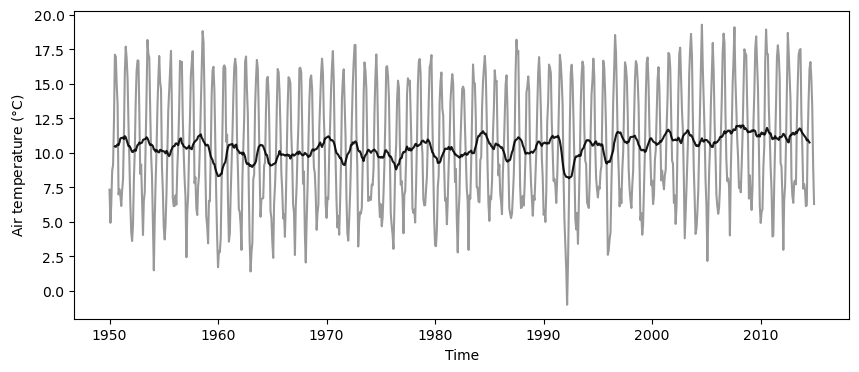

In [5]:
# Plot air temperature with time
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
plt.plot(time, surface_temp, 
         color="gray", alpha=0.8)
plt.ylabel("Air temperature ($\degree$C)")
plt.xlabel("Time")

# Add rolling averages to this plot
# Annual rolling averages
rolling_surface_temp_12 = surface_temp.rolling(time=12, center=True).mean()
plt.plot(rolling_surface_temp_12.time, rolling_surface_temp_12, 
         color="black", alpha=0.9)


## Climatology
In general, the "climatology" prediction is defined based on the temperature for a given location on a given date from the entire history. We generally assume we need at least 30 years of data. 


## Advanced: consider changing climate.
How would you account for changing climate? 